Exercícios de Revisão A2
--
Professor: Renato Rocha Souza  
--

In [1]:
import itertools
import random
from collections import Counter
import re

import pymysql
import sqlite3
import getpass

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas.io.sql as psql

import string

%matplotlib inline

### Parte I - Pandas

Para o Dataframe abaixo, resolva as seguintes tarefas:

In [2]:
df_zoo = pd.read_csv('../Dados/zoo.csv')
df_zoo.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


1 - Crie uma série somente com os nomes dos animais (primeira coluna)

In [3]:
serie=df_zoo.animal
serie.head()

0    aardvark
1    antelope
2        bass
3        bear
4        boar
Name: animal, dtype: object

2 - Transforme os campos com as strings "True"/"False" em variáveis booleanas True/False  
Veja as dicas [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) e [aqui](https://stackoverflow.com/questions/49259580/replace-values-in-a-pandas-series-via-dictionary-efficiently)

3 - Crie um novo dataframe somente com os Mamíferos

In [4]:
df_mamiferos=df_zoo[df_zoo.type == 'mammal']
df_mamiferos[0:5]

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
5,buffalo,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal


4 - Crie um gráfico com os números de patas por animais  
Veja as dicas [aqui](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html)

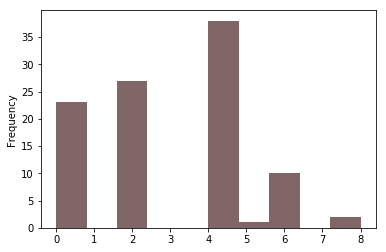

In [5]:
df_zoo.legs.plot(kind='hist', color=(0.5,0.4,0.4))

5 - crie uma tabela no banco alunos a partir do dataframe  
ver referência [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html)

In [6]:
p = getpass.getpass()
conn = pymysql.connect(host='127.0.0.1', #localhost
                       port=3306, 
                       user='aluno', 
                       passwd=p, 
                       db='alunos')

conn = sqlite3.connect('tabela_zoo')

········


In [7]:
df_zoo.to_sql('tabela_zoo', con=conn)

ValueError: Table 'tabela_zoo' already exists.

Outro caminho.

In [8]:
cur = conn.cursor()

In [9]:
cur.execute("SELECT * FROM tabela_zoo;")
for r in cur.fetchmany(12):
    print(r)

(0, 'aardvark', 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 1, 'mammal')
(1, 'antelope', 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(2, 'bass', 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 'fish')
(3, 'bear', 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 1, 'mammal')
(4, 'boar', 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(5, 'buffalo', 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(6, 'calf', 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 1, 1, 'mammal')
(7, 'carp', 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 'fish')
(8, 'catfish', 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 'fish')
(9, 'cavy', 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 0, 1, 0, 'mammal')
(10, 'cheetah', 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(11, 'chicken', 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 'bird')


In [10]:
conn = sqlite3.connect('tabela_zoo')

In [11]:
df_zoo.to_sql('tabela_zoo', con=conn)

ValueError: Table 'tabela_zoo' already exists.

In [12]:
cur = conn.cursor()

In [13]:
cur.execute("SELECT * FROM sqlite_master;")
for r in cur.fetchall():
    print(r)

('table', 'tabela_zoo', 'tabela_zoo', 2, 'CREATE TABLE "tabela_zoo" (\n"index" INTEGER,\n  "animal" TEXT,\n  "hair" INTEGER,\n  "feathers" INTEGER,\n  "eggs" INTEGER,\n  "milk" INTEGER,\n  "airborne" INTEGER,\n  "aquatic" INTEGER,\n  "predator" INTEGER,\n  "toothed" INTEGER,\n  "backbone" INTEGER,\n  "breathes" INTEGER,\n  "venomous" INTEGER,\n  "fins" INTEGER,\n  "legs" INTEGER,\n  "tail" INTEGER,\n  "domestic" INTEGER,\n  "catsize" INTEGER,\n  "type" TEXT\n)')
('index', 'ix_tabela_zoo_index', 'tabela_zoo', 3, 'CREATE INDEX "ix_tabela_zoo_index"ON "tabela_zoo" ("index")')


In [14]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('tabela_zoo',)]


In [15]:
cur.execute("SELECT * FROM tabela_zoo;")
for r in cur.fetchmany(12):
    print(r)

(0, 'aardvark', 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 1, 'mammal')
(1, 'antelope', 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(2, 'bass', 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 'fish')
(3, 'bear', 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 1, 'mammal')
(4, 'boar', 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(5, 'buffalo', 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(6, 'calf', 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 1, 1, 'mammal')
(7, 'carp', 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 'fish')
(8, 'catfish', 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 'fish')
(9, 'cavy', 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 0, 1, 0, 'mammal')
(10, 'cheetah', 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammal')
(11, 'chicken', 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 'bird')


In [16]:
new_df = pd.read_sql_query("SELECT * FROM tabela_zoo;", conn)
new_df.head()

,index,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
1,1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammal
2,2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,fish
3,3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
4,4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammal


### Parte 2 - Shell Linux

Usando comandos do Shell, abra o arquivo ../Dados/DomCasmurroMachadoAssis.txt e resolva as seguintes tarefas:

1 - Ordene as palavras do texto nas formas abaixo:
+ ordem ascii
+ ordem alfabética
+ ordem de "rima"

Questão A

In [17]:
#L
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr ']' '\n'| tr -sc '[a-záàâãéêíôóõúç][A-ZÁÀÃÂÉÊÍÓÔÚÇ]' '[\012*]' | sort | uniq


a
A
á
ab
abafadas
abafado
abafando
abafava
abahuladas
abaixo
Abaixo
abaixou
abalo
abalou
abanando
abanava
abandone
Abane
abanou
abarcar
abatida
abatido
abatimento
Abel
abençoa
abençoar
aberração
aberta
abertas
aberto
abertos
abide
abobada
abolir
abominação
abominações
abominaveis
aborrece
aborrecem
aborrecer
aborreciamos
aborrecida
aborrecido
aborrecimento
aborrecivel
abortado
abotoada
abotoado
abotoe
about
About
abra
abraçados
abraçal
abraçará
abraço
abraços
abraçou
Abrahão
abre
Abre
abreviado
abri
Abri
abria
abríamos
abrigado
abril
Abril
Abrimos
abrindo
abrir
abrira
abrissemos
abriu
abrochado
abrochou
absoluta
absolutamente
absolve
absolvição
absolvido
abusa
abusava
abuso
abysmo
acaba
acabada
acabadas
acabado
acabam
acabámos
acabando
acabar
acabaram
acabaria
acabas
acabasse
acabassem
acabava
acabavam
acabei
Acabei
Acabemos
acabo
acabou
Acabou
ACADEMIA
acalcanhados
acanhada
acanhado
acanhamento
acaso
Acaso
acção
acceita
acceital
acceitámos
acceitando
acceitar
acceitasse
acceitei
Acce

correndo
corrente
correr
correria
correriam
correspondencia
correspondente
correspondentes
Correspondia
corresse
corressem
corretor
correu
corri
Corri
corria
corriam
corrigia
corrigil
corrigir
corrigiu
corrompeu
corrupção
corrupt
corta
cortados
cortar
cortejar
cortejou
cortezia
cortezias
cortina
cortinas
cosendo
coser
Cosi
cosida
cosidas
cosido
cosinha
Cosme
Cosmo
cost
Costa
costas
costs
costumada
costumava
costume
costumes
costura
coubesse
could
countries
country
couro
course
cousa
cousas
Cousas
cova
cravar
crê
creação
creada
creadas
creado
creanca
creança
creancas
creanças
creancices
creançola
creançolas
created
creating
Creating
creation
creatura
creaturas
creaturinha
credit
credor
credos
creem
creia
creio
Creio
crendice
crendo
crentes
Creou
crer
cresce
crescendo
crescente
crescer
cresceu
crescia
crescidos
crespo
cri
cria
criadas
criado
Criado
criados
crianças
criei
Criei
crime
Criméa
criminoso
crise
crises
critica
critical
criticas
cru
cruas
cruel
cruz
Cruz
cruzavam
cuida
cuidado
c

In [18]:
#T
! export LC_ALL=C
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' < ../Dados/DomCasmurroMachadoAssis.txt | sort | uniq

cat: write error: Broken pipe

]
a
A
ab
abafadas
abafado
abafando
abafava
abahuladas
abaixo
Abaixo
abaixou
abalo
abalou
abanando
abanava
abandone
Abane
abanou
abarcar
abatida
abatido
abatimento
Abel
aben
aberra
aberta
abertas
aberto
abertos
abide
abobada
abolir
abomina
abominaveis
aborrece
aborrecem
aborrecer
aborreciamos
aborrecida
aborrecido
aborrecimento
aborrecivel
abortado
abotoada
abotoado
abotoe
about
About
abr
abra
Abrah
abre
Abre
abreviado
abri
Abri
abria
abrigado
abril
Abril
Abrimos
abrindo
abrir
abrira
abrissemos
abriu
abrochado
abrochou
absoluta
absolutamente
absolve
absolvi
absolvido
abusa
abusava
abuso
abysmo
ac
acab
acaba
acabada
acabadas
acabado
acabam
acabando
acabar
acabaram
acabaria
acabas
acabasse
acabassem
acabava
acabavam
acabei
Acabei
Acabemos
acabo
acabou
Acabou
ACADEMIA
acalcanhados
acanhada
acanhado
acanhamento
acaso
Acaso
acceit
acceita
acceital
acceitando
acceitar
acceitasse
acceitei
Acceitei
acceito
Acceito
acceitou
accender
accendesse
accendeu
accendi
acce

collocou
Colombo
colorido
colorindo
columnas
com
Com
comadre
combatel
combatendo
combater
combates
Combati
combina
combinam
combinar
combor
come
Come
comece
comecei
Comecei
comecemos
comendo
comer
comeram
comi
comia
comida
comido
commandante
commemorativo
commentando
commentario
commentarios
commentou
commerciaes
commercial
commercialmente
commerciante
commercio
commettia
commettido
commigo
Commigo
commiss
committed
commo
commoda
commodidades
commover
commoveram
commoviam
commovida
commovido
Commovido
commovidos
commum
communh
communica
communicativa
communicativo
communs
comnosco
como
Como
comp
compadrio
companheira
companheiras
companheiro
companheiros
companhia
companhias
compara
Compara
comparada
comparado
comparal
comparando
comparativamente
comparavel
comparou
compassado
compassivo
compelliu
compendios
compensa
compensam
compensar
compensarem
competir
compiladores
compilation
complei
complemento
completa
completando
completas
completasse
completo
completou
complexo
compliance
Com

pequeno
pequenos
peralta
peraltas
perca
percebel
Percorreu
percorri
perd
Perd
perda
perde
Perde
perdel
perdem
perdendo
perder
Perder
perdera
Perdera
perderam
perdesse
perdeu
Perdeu
perdi
perdia
perdiamos
perdida
perdido
perdidos
perdoa
perdoai
perdoasse
perdoava
perdoe
Perdoe
perdoei
perdoou
Pereira
peremptorio
perfei
Perfei
perfeitamente
Perfeitamente
perfeitissimo
perfeito
perfidia
perfil
perfis
perform
performances
performed
performing
pergunt
pergunta
perguntando
perguntar
perguntas
perguntasse
perguntava
Perguntava
perguntavam
pergunte
Pergunte
perguntei
Perguntei
perguntes
pergunto
perguntou
Perguntou
pericia
perigo
periodic
periodicos
periodo
peripecias
permanent
Permanentes
permeio
permission
permitted
permittia
permittiria
permittiu
perna
pernadas
Pernambuco
pernas
perninhas
perola
perpassar
perpetua
perplexa
perseguia
perseguiam
perseguil
persianas
persignei
persiste
persistiria
person
personagem
personagens
perspectiva
persuadir
persuas
pertencem
perto
Perto
perturbava
perve

Questão B

In [19]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | sort | uniq -c

      1 
      1 ]
   2742 a
    257 A
      1 ab
      1 abafadas
      1 abafado
      1 abafando
      1 abafava
      1 abahuladas
      4 abaixo
      2 Abaixo
      1 abaixou
      2 abalo
      1 abalou
      1 abanando
      3 abanava
      1 abandone
      3 Abane
      3 abanou
      1 abarcar
      2 abatida
      3 abatido
      1 abatimento
      1 Abel
      2 aben
      1 aberra
      2 aberta
      1 abertas
      4 aberto
      5 abertos
      1 abide
      1 abobada
      1 abolir
      2 abomina
      1 abominaveis
      1 aborrece
      1 aborrecem
      4 aborrecer
      1 aborreciamos
      3 aborrecida
      5 aborrecido
      2 aborrecimento
      2 aborrecivel
      1 abortado
      1 abotoada
      1 abotoado
      1 abotoe
      7 about
      1 About
      1 abr
     10 abra
      1 Abrah
      1 abre
      1 Abre
      1 abreviado
      1 abri
      1 Abri
      6 abria
      1 abrigado
      3 abril
      1 Abril
      1 Abrimos
      2 abrindo
      6 abri

      1 corresse
      1 corressem
      1 corretor
      5 correu
     12 corri
      4 Corri
      5 corria
      1 corriam
      1 corrigia
      1 corrigil
      1 corrigir
      2 corrigiu
      1 corrompeu
      1 corrup
      1 corrupt
      1 corta
      1 cortados
      1 cortar
      2 cortejar
      1 cortejou
      1 cortezia
      1 cortezias
      2 cortina
      1 cortinas
      1 cosendo
      1 coser
      1 Cosi
      1 cosida
      1 cosidas
      3 cosido
      1 cosinha
     55 Cosme
      1 Cosmo
      3 cost
      2 Costa
     14 costas
      2 costs
      1 costumada
      2 costumava
     28 costume
     10 costumes
      3 costura
      1 coubesse
      1 could
      1 countries
      4 country
      1 couro
      1 course
     98 cousa
     26 cousas
      1 Cousas
      2 cova
      3 cr
      1 cravar
      3 crea
      1 creada
      1 creadas
      2 creado
     25 crean
      2 creanca
      2 creancas
      1 creancices
      2 created
      3 creating


      1 mostr
      3 mostra
      2 mostrador
     10 mostrar
      1 Mostrar
      1 mostraria
      2 mostrasse
      3 mostrava
      2 mostravam
      2 mostre
      3 mostrei
      2 Mostrei
      1 mostro
      6 mostrou
      1 mote
      6 motivo
      6 motivos
      4 mouro
      1 movedi
      3 moveis
      1 movemos
      2 mover
      1 moveu
      1 moviam
      1 movimenta
      3 movimento
      4 movimentos
      1 much
      1 mud
      2 muda
      1 mudada
      1 mudadas
      3 mudado
      6 mudan
      1 mudando
      4 mudar
      1 mudaram
      1 mudava
      1 mudavam
      1 mude
      2 mudo
      3 mui
     29 muita
      1 Muita
     15 muitas
    149 muito
      2 Muito
     17 muitos
      2 Muitos
      1 mula
      1 mulas
     30 mulher
      1 Mulher
      8 mulheres
      1 Mulheres
      1 multid
      1 multiplicam
      1 multiplicava
      1 multiplique
     37 mundo
      1 Municipaes
      1 murchos
      2 murmurando
      1 Murmurei
    

In [20]:
#T
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' < ../Dados/DomCasmurroMachadoAssis.txt | sort | uniq -c

cat: write error: Broken pipe
      1 
      1 ]
   2742 a
    257 A
      1 ab
      1 abafadas
      1 abafado
      1 abafando
      1 abafava
      1 abahuladas
      4 abaixo
      2 Abaixo
      1 abaixou
      2 abalo
      1 abalou
      1 abanando
      3 abanava
      1 abandone
      3 Abane
      3 abanou
      1 abarcar
      2 abatida
      3 abatido
      1 abatimento
      1 Abel
      2 aben
      1 aberra
      2 aberta
      1 abertas
      4 aberto
      5 abertos
      1 abide
      1 abobada
      1 abolir
      2 abomina
      1 abominaveis
      1 aborrece
      1 aborrecem
      4 aborrecer
      1 aborreciamos
      3 aborrecida
      5 aborrecido
      2 aborrecimento
      2 aborrecivel
      1 abortado
      1 abotoada
      1 abotoado
      1 abotoe
      7 about
      1 About
      1 abr
     10 abra
      1 Abrah
      1 abre
      1 Abre
      1 abreviado
      1 abri
      1 Abri
      6 abria
      1 abrigado
      3 abril
      1 Abril
      1 Abrimo

      2 annunciou
      1 anonyma
      1 anonymo
      1 ante
      1 antecipadamente
      1 antecipado
      1 antep
      7 anterior
      2 Anterior
      3 anteriores
     77 antes
     11 Antes
      1 anti
     15 antiga
      8 antigas
      9 antigo
      5 antigos
      1 antiguidade
      3 Antonio
      1 anuo
     33 any
      1 Any
      3 ANY
      5 anyone
      1 anything
      1 ANYTHING
      2 anywhere
    330 ao
     44 Ao
      2 aonde
     85 aos
      4 Aos
      9 ap
      1 Ap
      1 apagado
      1 apagam
      2 apagar
      4 apagou
      1 apaixonadamente
      1 apaixonar
      1 apalpa
      1 apalpar
      2 apalpava
      1 apalpei
      2 Apalpei
      1 apanh
      2 apanhado
      2 apanhados
      4 apanhar
      1 Apanhar
      1 apanhara
      1 apanhava
      2 apanhou
      1 aparentado
      1 apavorado
      1 apear
      1 apeava
     25 apenas
      1 apeou
      2 apertada
      1 apertadas
      2 apertado
      3 apertal
      4 aperta

      2 dobrado
      1 dobrar
      1 dobras
      2 dobrava
      1 dobre
      1 dobro
     19 doce
      5 doces
      1 docilidade
      2 documentos
      1 doe
      1 doem
      8 doen
     10 doente
      1 Doente
      2 doentes
      2 does
      2 doesse
      3 doeu
      3 doia
      2 dom
      9 Dom
      3 DOM
      2 domain
      1 domesticos
      1 dominar
      3 dominava
      1 dominem
     17 domingo
      2 domingos
      1 dominou
      1 Dominus
      4 dona
      5 donate
      1 donation
     12 donations
      2 Donations
      1 DONATIONS
     10 donde
      1 Donde
      7 dono
      1 donors
      3 dor
      1 dores
      3 dormi
      4 dormia
      2 dormiam
      2 dormindo
      1 dorminhocos
     10 dormir
      1 dormira
      2 dormisse
      1 dormitorio
      2 dormiu
      1 dorso
    197 dos
      2 Dos
      1 dotado
      2 dotes
     10 dou
      1 doudamente
     60 dous
      1 Dous
     10 doutor
      5 doutrina
      1 downloading
  

      1 Mezes
      1 Michael
      1 middle
      1 Miguel
     15 mil
      4 Mil
      1 milagre
      1 milagres
      1 milh
      1 milhar
      2 milhares
      1 milho
      1 militar
      1 millionario
    162 mim
      1 mimo
      1 mimosa
      1 mimosas
      1 mimoso
      1 Minas
      2 mineira
    312 minha
     30 Minha
     29 minhas
      1 miniatura
      1 minima
      1 minimas
      1 ministerio
      1 ministro
      1 ministros
      1 Minto
      2 minucias
      1 minuciosa
      5 minuto
     30 minutos
      1 Miquelina
      3 miral
      5 mirando
      3 mirar
      1 mirava
      1 miseravel
      1 miseria
      2 misericordia
     31 missa
      4 missas
      3 mission
      1 Mission
      1 Mississippi
      3 mister
      1 mistura
      2 miudas
      2 miudo
      2 miudos
     48 mo
      1 Mo
      1 mobilia
      1 mobilias
      1 mocet
      1 mocetona
      1 Mocetona
      9 mocidade
      1 mocinha
      3 mocinho
      1 moco
      6 

      1 Viviam
      1 vivido
      6 vivo
      2 Vivo
      1 vivos
      1 voavam
     92 voc
     48 Voc
     29 voca
      1 Voca
      1 voce
      1 Voce
      1 void
      1 voil
      1 Voil
      1 vol
      1 volc
      4 volt
      1 Volt
     15 volta
      2 Volta
      2 voltada
      3 voltado
      1 voltados
      1 voltamos
     14 voltando
     11 voltar
      1 voltara
      1 voltaram
      1 Voltarei
      2 voltarete
      1 voltaria
      1 Voltaria
      5 voltas
      1 Voltas
      1 voltasse
      3 voltava
      1 Voltava
      2 voltavam
      2 voltavamos
      6 voltei
      2 Voltei
      2 volto
      8 voltou
      1 Voltou
      1 volubilidade
      1 voluntario
      1 volunteer
      5 volunteers
      1 Volunteers
      1 vomitorio
     27 vontade
      1 Vontade
      1 vontades
      1 voou
      7 vos
      1 vosmec
      2 Vossa
      1 vosso
      1 vossos
     19 vou
     13 Vou
     43 voz
      8 vozes
      1 Vozes
      3 vulgar
      1

In [99]:
#L
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr ']' '\n'| tr -sc '[a-záàâãéêíôóõúç][A-ZÁÀÃÂÉÊÍÓÔÚÇ]' '[\012*]' | sort -h | uniq | head


a
A
á
ab
abafadas
abafado
abafando
abafava
abahuladas
uniq: write error: Broken pipe


Questão C

In [98]:
#T
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | rev | sort | rev | uniq -c | sed -n '110,130p'

      3 dada
      1 assobradada
      1 mandada
      1 prendada
      2 guardada
      1 mudada
      1 lisongeada
      1 creada
      3 fada
      1 almofada
      2 socegada
      2 chegada
      1 obrigada
      2 castigada
      1 zangada
      1 engasgada
      3 madrugada
      1 trabalhada
      1 palhada
      1 atrapalhada
      1 enxovalhada


In [97]:
#L
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr [A-Z] [a-z] | tr ']' '\n'| tr -sc '[a-záàâãéêíôóõúç][A-ZÁÀÃÂÉÊÍÓÔÚÇ]' '[\012*]' | sort | uniq | rev | sort | rev | head

rev: stdin: Invalid or incomplete multibyte or wide character

a
á
acaba
barba
ameaça
bocca
bibliotheca
boneca
aconteça
uniq: write error: Broken pipe


In [96]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | rev | sort | rev | uniq -c |head

      1 
      1 ]
   2742 a
    257 A
      2 acaba
      1 saiba
      1 amba
      1 emba
      1 barba
      1 Corityba
uniq: write error: Broken pipe


2 - Quantas palavras maiúsculas distintas há no texto?

In [25]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | sort | uniq | grep '^[A-Z]' | wc -l

1499


In [26]:
#T
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | egrep '*[A-Z]' | sort | uniq -c | wc -l

1502


In [27]:
#L
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[a-záàâãéêíôóõúç][A-ZÁÀÃÂÉÊÍÓÔÚÇ]' '[\012*]' | sort -n | uniq | grep -c ^[A-Z]

1531


3 - Quantas palavras há com apenas uma, com apenas duas, e com apenas 3 vogais?

In [28]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr '[A-Z]' '[a-z]' | tr -sc '[A-Z][a-z]' '[\012*]' | grep -i '^[^aeiou]*[aeiou][^aeiou]*$' | sort | uniq | wc -l

470


In [29]:
#T
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | egrep '\<[^AEIOUaeiou]*[AEIOUaeiou][^AEIOUaeiou]*\>' | sort | uniq -c | wc -l

610


In [30]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr '[A-Z]' '[a-z]' | tr -sc '[A-Z][a-z]' '[\012*]' | grep -i '^[^aeiou]*[aeiou][^aeiou]*[aeiou][^aeiou]*$' | sort | uniq | wc -l

2063


In [31]:
#T
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | egrep '\<[^AEIOUaeiou]*[AEIOUaeiou][^AEIOUaeiou]*[AEIOUaeiou][^AEIOUaeiou]*\>' | sort | uniq | wc -l

2350


In [32]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr '[A-Z]' '[a-z]' | tr -sc '[A-Z][a-z]' '[\012*]' | grep -i '^[^aeiou]*[aeiou][^aeiou]*[aeiou][^aeiou]*[aeiou][^aeiou]*$' | sort | uniq | wc -l

3174


In [33]:
#T
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | egrep '\<[^AEIOUaeiou]*[AEIOUaeiou][^AEIOUaeiou]*[AEIOUaeiou][^AEIOUaeiou]*[AEIOUaeiou][^AEIOUaeiou]*\>' | sort | uniq | wc -l

3447


In [34]:
#L
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[a-záàâãéêíôóõúç][A-ZÁÀÃÂÉÊÍÓÔÚÇ]' '[\012*]' | grep [aeiouáàâãéêíôóõú][^aeiouáàâãéêíôóõú]*[aeiouáàâãéêíôóõú] | grep -vc [aeiouáàâãéêíôóõú].*[aeiouáàâãéêíôóõú].*[aeiouáàâãéêíôóõú]

20683


In [35]:
#L
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[a-záàâãéêíôóõúç][A-ZÁÀÃÂÉÊÍÓÔÚÇ]' '[\012*]' | grep [aeiouáàâãéêíôóõú][^aeiouáàâãéêíôóõú]*[aeiouáàâãéêíôóõú][^aeiouáàâãéêíôóõú]*[aeiouáàâãéêíôóõú] | grep -vc [aeiouáàâãéêíôóõú].*[aeiouáàâãéêíôóõú].*[aeiouáàâãéêíôóõú].*[aeiouáàâãéêíôóõú]

13041


4 - Qual a sequência de comandos para criar um arquivo com os bigramas e suas contagens?

In [114]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' > ../Dados/DomCasmurroMachadoAssis.words
! tail -n+2 ../Dados/DomCasmurroMachadoAssis.words > ../Dados/DomCasmurroMachadoAssis.nextwords
! paste ../Dados/DomCasmurroMachadoAssis.words ../Dados/DomCasmurroMachadoAssis.nextwords | sort | uniq -c | sort -nr > ../Dados/domcasmurro.bigrams
! cat ../Dados/domcasmurro.bigrams | head

   1217 n	o
    315 N	o
    238 o	que
    230 m	e
    188 que	n
    173 que	me
    151 Jos	Dias
    138 minha	m
    137 que	eu
    130 que	a
cat: write error: Broken pipe


In [113]:
#T
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' > ../Dados/domcasmurro.words
! tail -n+2 ../Dados/domcasmurro.words > ../Dados/domcasmurro.nextwords
! paste ../Dados/domcasmurro.words ../Dados/domcasmurro.nextwords | sort | uniq -c | sort -nr> ../Dados/domcasmurro.bigrams
! cat ../Dados/domcasmurro.bigrams | head

   1217 n	o
    315 N	o
    238 o	que
    230 m	e
    188 que	n
    173 que	me
    151 Jos	Dias
    138 minha	m
    137 que	eu
    130 que	a
cat: write error: Broken pipe


In [111]:
#L
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[a-záàâãéêíôóõúç][A-ZÁÀÃÂÉÊÍÓÔÚÇ]' '[\012*]' > ../Dados/Dom_words.txt
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[a-záàâãéêíôóõúç][A-ZÁÀÃÂÉÊÍÓÔÚÇ]' '[\012*]' | tail  -n +2 > ../Dados/Dom_nextwords.txt
!paste ../Dados/Dom_words.txt ../Dados/Dom_nextwords.txt | sort | uniq -c | sort -nr | head

    187 que	não
    173 que	me
    163 é	que
    155 o	que
    151 José	Dias
    137 que	eu
    134 minha	mãe
    128 que	a
    117 que	o
    107 e	o
sort: write failed: 'standard output': Broken pipe
sort: write error


### Parte 3 - Expressões Regulares

1 - Repita os exercícios 1 a 4 da parte 2 utilizando Python

In [102]:
with open('../Dados/DomCasmurroMachadoAssis.txt', 'r') as f:
    texto = f.read()
print(texto[0:500])

﻿The Project Gutenberg EBook of Dom Casmurro, by Machado de Assis

This eBook is for the use of anyone anywhere in the United States and most
other parts of the world at no cost and with almost no restrictions
whatsoever.  You may copy it, give it away or re-use it under the terms of
the Project Gutenberg License included with this eBook or online at
www.gutenberg.org.  If you are not located in the United States, you'll have
to check the laws of the country where you are located before using th


In [103]:
palavras = texto.split()
palavras = [p.strip(string.punctuation) for p in palavras]
palavras[0:10]

['\ufeffThe',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Dom',
 'Casmurro',
 'by',
 'Machado',
 'de']

In [104]:
#T
#Exercicio 2
maiusculas = re.findall(r'\s[$A-Z]{1}[a-z]*', texto)
len(maiusculas)

6266

In [52]:
#T
#Exercicio 3
vogais=['A','E','I','O','U','a','e','i','o','u']
umavogal=[]
for palavra in palavras:
    palavraorig=palavra
    palavra=list(palavra)
    quantidadevogais=0
    for vogal in vogais:
        while vogal in palavra:
            palavra.remove(vogal)
            quantidadevogais+=1
    if quantidadevogais==1:
        umavogal.append(palavraorig)
print(len(umavogal))

23037


In [53]:
#Exercicio 4
bigramas=[]
for i in range(0,len(palavras)-1):
    bigramas.append(palavras[i]+' --> '+palavras[i+1])
contagem={}
for i in bigramas:    
    if i in contagem:
        contagem[i]+=1
    else:
        contagem[i]=0
bigramas=list(set(bigramas))
listafinal=[]
for k in bigramas:
    listafinal.append([str(contagem[k]),k])
listafinal.sort(reverse=True)

In [54]:
g = open('ex4revisaoa22018.txt', mode='w', encoding='utf-8')
for i in listafinal:
    g.write(i[1])
    g.write(' -|- ')
    g.write(i[0])
    g.write('\n')
g.close()

In [55]:
f.close()

In [106]:
#Exercicio 4
trigramas=[]
for i in range(0,len(palavras)-2):
    trigramas.append(palavras[i]+' --> '+palavras[i+1]+' --> '+palavras[i+2])
contagem={}
for i in trigramas:    
    if i in contagem:
        contagem[i]+=1
    else:
        contagem[i]=0
trigramas=list(set(trigramas))
listafinal=[]
for k in trigramas:
    listafinal.append([str(contagem[k]),k])
listafinal.sort(reverse=True)

In [ ]:
g = open('ex4revisaoa22018trigramas.txt', mode='w', encoding='utf-8')
for i in listafinal:
    g.write(i[1])
    g.write(' -|- ')
    g.write(i[0])
    g.write('\n')
g.close()

In [58]:
f.close()

In [59]:
#L
f = open('../Dados/DomCasmurroMachadoAssis.txt',encoding='utf-8')
texto = f.read()
palavras = texto.split()
palavras = {p.strip(string.punctuation) for p in palavras}
palavras = {p for p in palavras if not p[0:1].isnumeric()}
rimas = {r[::-1] for r in palavras}

ordem1 = sorted(palavras,key=ascii)
ordem2 = sorted(palavras)
ordem3 = sorted(rimas)
ordem3 = [r[::-1] for r in ordem3]

In [60]:
#L
with open('../Dados/DomCasmurroMachadoAssis.txt',encoding='utf-8') as g:
    texto = g.read()
    words = texto.split()
    words = [p.strip(string.punctuation) for p in words]
    words = [m for m in words if len(m) > 0]
    maiusculas = {m for m in words if m[0].isupper()}
    print(len(maiusculas))

1604


### Parte 4 - Bancos de dados

In [61]:
p = getpass.getpass()
conn = pymysql.connect(host='127.0.0.1', #localhost
                       port=3306, 
                       user='aluno', 
                       passwd=p, 
                       db='SQLExample1')
cur = conn.cursor()

········


In [62]:
cur.execute('use SQLExample1;')
cur.execute('show tables;')
for r in cur.fetchall():
    print(r)

('account',)
('branch',)
('business',)
('customer',)
('department',)
('employee',)
('individual',)
('officer',)
('product',)
('product_type',)
('transaction',)


In [63]:
cur.execute('describe account;')
for r in cur.fetchall():
    print(r)

('account_id', 'int(10) unsigned', 'NO', 'PRI', None, 'auto_increment')
('product_cd', 'varchar(10)', 'NO', 'MUL', None, '')
('cust_id', 'int(10) unsigned', 'NO', 'MUL', None, '')
('open_date', 'date', 'NO', '', None, '')
('close_date', 'date', 'YES', '', None, '')
('last_activity_date', 'date', 'YES', '', None, '')
('status', "enum('ACTIVE','CLOSED','FROZEN')", 'YES', '', None, '')
('open_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('open_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('avail_balance', 'float(10,2)', 'YES', '', None, '')
('pending_balance', 'float(10,2)', 'YES', '', None, '')


In [64]:
cur.execute('select * from account limit 5;')
for r in cur.fetchall():
    print(r)

(1, 'CHK', 1, datetime.date(2000, 1, 15), None, datetime.date(2005, 1, 4), 'ACTIVE', 2, 10, 1057.75, 1057.75)
(2, 'SAV', 1, datetime.date(2000, 1, 15), None, datetime.date(2004, 12, 19), 'ACTIVE', 2, 10, 500.0, 500.0)
(3, 'CD', 1, datetime.date(2004, 6, 30), None, datetime.date(2004, 6, 30), 'ACTIVE', 2, 10, 3000.0, 3000.0)
(4, 'CHK', 2, datetime.date(2001, 3, 12), None, datetime.date(2004, 12, 27), 'ACTIVE', 2, 10, 2258.02, 2258.02)
(5, 'SAV', 2, datetime.date(2001, 3, 12), None, datetime.date(2004, 12, 11), 'ACTIVE', 2, 10, 200.0, 200.0)


In [65]:
cur.execute('describe product;')
for r in cur.fetchall():
    print(r)

('product_cd', 'varchar(10)', 'NO', 'PRI', None, '')
('name', 'varchar(50)', 'NO', '', None, '')
('product_type_cd', 'varchar(10)', 'NO', 'MUL', None, '')
('date_offered', 'date', 'YES', '', None, '')
('date_retired', 'date', 'YES', '', None, '')


In [66]:
cur.execute('select * from product;')
for r in cur.fetchall():
    print(r)

('AUT', 'auto loan', 'LOAN', datetime.date(2000, 1, 1), None)
('BUS', 'business line of credit', 'LOAN', datetime.date(2000, 1, 1), None)
('CD', 'certificate of deposit', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('CHK', 'checking account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('MM', 'money market account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('MRT', 'home mortgage', 'LOAN', datetime.date(2000, 1, 1), None)
('SAV', 'savings account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('SBL', 'small business loan', 'LOAN', datetime.date(2000, 1, 1), None)


In [67]:
cur.execute('describe product_type;')
for r in cur.fetchall():
    print(r)

('product_type_cd', 'varchar(10)', 'NO', 'PRI', None, '')
('name', 'varchar(50)', 'NO', '', None, '')


In [68]:
cur.execute('select * from product_type;')
for r in cur.fetchall():
    print(r)

('ACCOUNT', 'Customer Accounts')
('INSURANCE', 'Insurance Offerings')
('LOAN', 'Individual and Business Loans')


In [69]:
cur.execute('describe employee;')
for r in cur.fetchall():
    print(r)

('emp_id', 'smallint(5) unsigned', 'NO', 'PRI', None, 'auto_increment')
('fname', 'varchar(20)', 'NO', '', None, '')
('lname', 'varchar(20)', 'NO', '', None, '')
('start_date', 'date', 'NO', '', None, '')
('end_date', 'date', 'YES', '', None, '')
('superior_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('dept_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('title', 'varchar(20)', 'YES', '', None, '')
('assigned_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')


In [70]:
cur.execute('select * from employee limit 10;')
for r in cur.fetchall():
    print(r)

(1, 'Michael', 'Smith', datetime.date(2001, 6, 22), None, None, 3, 'President', 1)
(2, 'Susan', 'Barker', datetime.date(2002, 9, 12), None, 1, 3, 'Vice President', 1)
(3, 'Robert', 'Tyler', datetime.date(2000, 2, 9), None, 1, 3, 'Treasurer', 1)
(4, 'Susan', 'Hawthorne', datetime.date(2002, 4, 24), None, 3, 1, 'Operations Manager', 1)
(5, 'John', 'Gooding', datetime.date(2003, 11, 14), None, 4, 2, 'Loan Manager', 1)
(6, 'Helen', 'Fleming', datetime.date(2004, 3, 17), None, 4, 1, 'Head Teller', 1)
(7, 'Chris', 'Tucker', datetime.date(2004, 9, 15), None, 6, 1, 'Teller', 1)
(8, 'Sarah', 'Parker', datetime.date(2002, 12, 2), None, 6, 1, 'Teller', 1)
(9, 'Jane', 'Grossman', datetime.date(2002, 5, 3), None, 6, 1, 'Teller', 1)
(10, 'Paula', 'Roberts', datetime.date(2002, 7, 27), None, 4, 1, 'Head Teller', 2)


1 - Na tabela "account", quais os valores médio, mínimo e máximo de "avail_balance"?

In [71]:
q = '''
SELECT 
AVG(avail_balance) AS Medio,
MIN(avail_balance) AS Minimo, 
MAX(avail_balance) AS Maximo
FROM account;

'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

(7114.769138, 0.0, 50000.0)


In [72]:
#L
cur.execute('select avg(avail_balance), min(avail_balance), max(avail_balance) from account')
for r in cur.fetchall():
    print(r)

(7114.769138, 0.0, 50000.0)


2 - Quais registros na tabela "account" estão acima da média de "avail_balance"?

In [73]:
q = '''
SELECT *
FROM account
WHERE avail_balance > (
SELECT AVG(avail_balance)
FROM account);

'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

(15, 'CD', 6, datetime.date(2004, 12, 28), None, datetime.date(2004, 12, 28), 'ACTIVE', 1, 1, 10000.0, 10000.0)
(22, 'MM', 9, datetime.date(2004, 10, 28), None, datetime.date(2004, 10, 28), 'ACTIVE', 1, 1, 9345.55, 9845.55)
(24, 'CHK', 10, datetime.date(2002, 9, 30), None, datetime.date(2004, 12, 15), 'ACTIVE', 4, 16, 23575.12, 23575.12)
(27, 'BUS', 11, datetime.date(2004, 3, 22), None, datetime.date(2004, 11, 14), 'ACTIVE', 2, 10, 9345.55, 9345.55)
(28, 'CHK', 12, datetime.date(2003, 7, 30), None, datetime.date(2004, 12, 15), 'ACTIVE', 4, 16, 38552.05, 38552.05)
(29, 'SBL', 13, datetime.date(2004, 2, 22), None, datetime.date(2004, 12, 17), 'ACTIVE', 3, 13, 50000.0, 50000.0)


In [74]:
#L
cur.execute('''select * from account where avail_balance > 
                (select avg(avail_balance) from account);''')
for r in cur.fetchall():
    print(r)

(15, 'CD', 6, datetime.date(2004, 12, 28), None, datetime.date(2004, 12, 28), 'ACTIVE', 1, 1, 10000.0, 10000.0)
(22, 'MM', 9, datetime.date(2004, 10, 28), None, datetime.date(2004, 10, 28), 'ACTIVE', 1, 1, 9345.55, 9845.55)
(24, 'CHK', 10, datetime.date(2002, 9, 30), None, datetime.date(2004, 12, 15), 'ACTIVE', 4, 16, 23575.12, 23575.12)
(27, 'BUS', 11, datetime.date(2004, 3, 22), None, datetime.date(2004, 11, 14), 'ACTIVE', 2, 10, 9345.55, 9345.55)
(28, 'CHK', 12, datetime.date(2003, 7, 30), None, datetime.date(2004, 12, 15), 'ACTIVE', 4, 16, 38552.05, 38552.05)
(29, 'SBL', 13, datetime.date(2004, 2, 22), None, datetime.date(2004, 12, 17), 'ACTIVE', 3, 13, 50000.0, 50000.0)


3 - Na tabela "account", quais as 3 datas mais recentes e as 3 datas mais antigas ("open_date")?

In [75]:
q = '''
(SELECT open_date
FROM account
ORDER BY open_date DESC LIMIT 3)
UNION ALL
(SELECT open_date
FROM account
ORDER BY open_date LIMIT 3);
'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

(datetime.date(2004, 12, 28),)
(datetime.date(2004, 10, 28),)
(datetime.date(2004, 9, 30),)
(datetime.date(2000, 1, 15),)
(datetime.date(2000, 1, 15),)
(datetime.date(2000, 1, 15),)


In [76]:
#L
data = '''
(select open_date from account order by open_date limit 3)
UNION ALL
(select open_date from account order by open_date desc limit 3);
'''

cur.execute(data)

for r in cur.fetchall():
    print(r)

(datetime.date(2000, 1, 15),)
(datetime.date(2000, 1, 15),)
(datetime.date(2000, 1, 15),)
(datetime.date(2004, 12, 28),)
(datetime.date(2004, 10, 28),)
(datetime.date(2004, 9, 30),)


4 - Para cada elemento na tabela "product", exiba o nome completo do "product_type_cd" (tabela "product_type")

In [77]:
q = '''
SELECT p.name, pt.name FROM product as p
INNER JOIN product_type as pt
ON p.product_type_cd = pt.product_type_cd

'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

('auto loan', 'Individual and Business Loans')
('business line of credit', 'Individual and Business Loans')
('certificate of deposit', 'Customer Accounts')
('checking account', 'Customer Accounts')
('money market account', 'Customer Accounts')
('home mortgage', 'Individual and Business Loans')
('savings account', 'Customer Accounts')
('small business loan', 'Individual and Business Loans')


In [78]:
#L
q = '''
SELECT p.product_cd, p.name, p.product_type_cd, p.date_offered, p.date_retired, pt.name from product AS p
INNER JOIN product_type AS pt
ON p.product_type_cd = pt.product_type_cd
;
'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

('AUT', 'auto loan', 'LOAN', datetime.date(2000, 1, 1), None, 'Individual and Business Loans')
('BUS', 'business line of credit', 'LOAN', datetime.date(2000, 1, 1), None, 'Individual and Business Loans')
('CD', 'certificate of deposit', 'ACCOUNT', datetime.date(2000, 1, 1), None, 'Customer Accounts')
('CHK', 'checking account', 'ACCOUNT', datetime.date(2000, 1, 1), None, 'Customer Accounts')
('MM', 'money market account', 'ACCOUNT', datetime.date(2000, 1, 1), None, 'Customer Accounts')
('MRT', 'home mortgage', 'LOAN', datetime.date(2000, 1, 1), None, 'Individual and Business Loans')
('SAV', 'savings account', 'ACCOUNT', datetime.date(2000, 1, 1), None, 'Customer Accounts')
('SBL', 'small business loan', 'LOAN', datetime.date(2000, 1, 1), None, 'Individual and Business Loans')


In [79]:
#L
nome = '''select p.name,pt.name from product AS p 
inner join product_type as pt
on p.product_type_cd = pt.product_type_cd
'''

cur.execute(nome)
for r in cur.fetchall():
    print(r)

('auto loan', 'Individual and Business Loans')
('business line of credit', 'Individual and Business Loans')
('certificate of deposit', 'Customer Accounts')
('checking account', 'Customer Accounts')
('money market account', 'Customer Accounts')
('home mortgage', 'Individual and Business Loans')
('savings account', 'Customer Accounts')
('small business loan', 'Individual and Business Loans')


5 - Quantos empregados ("employees") possuem a letra "e" em seus nomes? E quantos tem sobrenomes que terminam com "r"? 

In [83]:
q = '''
SELECT COUNT(*)
FROM employee
WHERE fname LIKE '%e%'

'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

(6,)


In [84]:
q = '''
SELECT COUNT(*)
FROM employee
WHERE lname LIKE '%r'

'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

(6,)


In [85]:
#L

emp = '''select count(*) from employee where fname like '%e%' '''

cur.execute(emp)
for r in cur.fetchall():
    print(r)

    
emp = '''select count(*) from employee where lname like '%r' '''

cur.execute(emp)
for r in cur.fetchall():
    print(r)

(6,)
(6,)


6 - Quais são os títulos ("title") possíveis para os empregados ("employees")?

In [86]:
q = '''
SELECT DISTINCT title
FROM employee;
'''
cur.execute(q)
for r in cur.fetchall():
    print(r)

('President',)
('Vice President',)
('Treasurer',)
('Operations Manager',)
('Loan Manager',)
('Head Teller',)
('Teller',)


In [87]:
#L
title = '''select distinct title from employee'''

cur.execute(title)
for r in cur.fetchall():
    print(r)

('President',)
('Vice President',)
('Treasurer',)
('Operations Manager',)
('Loan Manager',)
('Head Teller',)
('Teller',)


7 - Quantos empregados ("employees") estão a exatamente dois níveis abaixo do presidente? 

In [132]:
q = '''
SELECT *
FROM employee
WHERE superior_emp_id = 3;
'''
cur.execute(q)
for r in cur.fetchall():
    print(r)

(4, 'Susan', 'Hawthorne', datetime.date(2002, 4, 24), None, 3, 1, 'Operations Manager', 1)


In [89]:
#L
q3 = '''
    select count(*) from employee where superior_emp_id in 
    (select emp_id from employee where superior_emp_id = 1)'''

cur.execute(q3)
for r in cur.fetchall():
    print(r)

(1,)


8 - Na tabela "account", quais os valores médio, mínimo e máximo de "avail_balance" por tipo de 'product_cd' ?

In [90]:
q = '''
SELECT product_cd,
AVG(avail_balance),
MIN(avail_balance), 
MAX(avail_balance)
FROM account
GROUP BY product_cd;
'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

('BUS', 4672.774902, 0.0, 9345.55)
('CD', 4875.0, 1500.0, 10000.0)
('CHK', 7300.800985, 122.37, 38552.05)
('MM', 5681.713216, 2212.5, 9345.55)
('SAV', 463.940002, 200.0, 767.77)
('SBL', 50000.0, 50000.0, 50000.0)


In [91]:
#L
cur.execute('select product_cd, avg(avail_balance), min(avail_balance), max(avail_balance) from account group by product_cd')
for r in cur.fetchall():
    print(r)


('BUS', 4672.774902, 0.0, 9345.55)
('CD', 4875.0, 1500.0, 10000.0)
('CHK', 7300.800985, 122.37, 38552.05)
('MM', 5681.713216, 2212.5, 9345.55)
('SAV', 463.940002, 200.0, 767.77)
('SBL', 50000.0, 50000.0, 50000.0)


9 - Na tabela "transaction", há quantos registros por ano ("txn_date")?

In [92]:
cur.execute('describe transaction;')
for r in cur.fetchall():
    print(r)

('txn_id', 'int(10) unsigned', 'NO', 'PRI', None, 'auto_increment')
('txn_date', 'datetime', 'NO', '', None, '')
('account_id', 'int(10) unsigned', 'NO', 'MUL', None, '')
('txn_type_cd', "enum('DBT','CDT')", 'YES', '', None, '')
('amount', 'double(10,2)', 'NO', '', None, '')
('teller_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('execution_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('funds_avail_date', 'datetime', 'YES', '', None, '')


In [93]:
q = '''
SELECT YEAR(txn_date), COUNT(*)
FROM transaction
GROUP BY YEAR(txn_date);
'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

(2000, 3)
(2001, 4)
(2002, 4)
(2003, 3)
(2004, 7)


In [94]:
#L
des = 'describe transaction'

reg = 'select year(txn_date), count(*) from transaction group by year(txn_date)'

cur.execute(reg)

for r in cur.fetchall(): print(r)

(2000, 3)
(2001, 4)
(2002, 4)
(2003, 3)
(2004, 7)


10 - Você é dono de uma loja de automóveis. Crie tabelas no banco "Alunos" para representar os carros de seu pátio, os modelos de automóveis, os clientes e as compras realizadas. 

In [ ]:
cur.execute('''CREATE TABLE loja_automoveis''')

In [115]:
cur.execute('use alunos;')
cur.execute('show tables;')
for r in cur.fetchall():
    print(r)

('Carros',)
('carrinho',)
('carros',)
('compras',)


In [122]:
cur.execute('describe carros;')
for r in cur.fetchall():
    print(r)

('text', 'varchar(200)', 'YES', '', None, '')
('number', 'int(11)', 'YES', '', None, '')


In [121]:
q = '''CREATE TABLE IF NOT EXISTS carros
       (Modelo VARCHAR(200) DEFAULT NULL,
        Placa INT DEFAULT NULL
        Data_de_compra DATE DEFAULT NULL
        Data_de_venda DATE DEFAULT NULL)
        ENGINE=MyISAM DEFAULT CHARSET='utf8';'''

#cur.execute(q)

/usr/local/lib/python3.5/dist-packages/pymysql/cursors.py:166: Warning: (1050, "Table 'carros' already exists")
  result = self._query(query)


0

11 - Crie uma lista no Python com todos os nomes e sobrenomes em strings únicas, a partir da tabela "individual"

In [125]:
cur.execute('use SQLExample1;')
cur.execute('describe individual;')
for r in cur.fetchall():
    print(r)

('cust_id', 'int(10) unsigned', 'NO', 'PRI', None, '')
('fname', 'varchar(30)', 'NO', '', None, '')
('lname', 'varchar(30)', 'NO', '', None, '')
('birth_date', 'date', 'YES', '', None, '')


In [129]:
lista=[]
q = ''' SELECT *
FROM individual'''
cur.execute(q)
for r in cur.fetchall():
    lista.append(str(r[1])+' '+str(r[2]))
lista

['James Hadley',
 'Susan Tingley',
 'Frank Tucker',
 'John Hayward',
 'Charles Frasier',
 'John Spencer',
 'Margaret Young',
 'Louis Blake',
 'Richard Farley']

In [130]:
names = []
cur.execute('select * from individual')
for r in cur.fetchall():
    names.append('{} {}'.format(r[1],r[2]))
names

['James Hadley',
 'Susan Tingley',
 'Frank Tucker',
 'John Hayward',
 'Charles Frasier',
 'John Spencer',
 'Margaret Young',
 'Louis Blake',
 'Richard Farley']

12 - A partir da tabela "individual", crie um dicionário no Python tendo os nomes e sobrenomes em strings únicas como chaves e os anos das datas como valores.

In [131]:
names_dict = {}
cur.execute('select fname,lname,year(birth_date) from individual')
for r in cur.fetchall():
    names_dict['{} {}'.format(r[0],r[1])] = r[2]
names_dict

{'Charles Frasier': 1971,
 'Frank Tucker': 1958,
 'James Hadley': 1972,
 'John Hayward': 1966,
 'John Spencer': 1962,
 'Louis Blake': 1977,
 'Margaret Young': 1947,
 'Richard Farley': 1968,
 'Susan Tingley': 1968}

13 - Utilizando Python, crie um banco de dados no sqlite que guarde a seguinte estrutura, demonstrada no dataframe do Pandas:  
Use os tipos de dados mais adequados.
Veja:  
https://sqlite.org/datatype3.html    
https://sqlite.org/autoinc.html  
https://www.tutorialspoint.com/sqlite/sqlite_update_query.htm  

http://pythonclub.com.br/gerenciando-banco-dados-sqlite3-python-parte1.html#conectando-e-desconectando-do-banco

In [143]:
df_tf = pd.read_excel('../Dados/votesurvey.xls')
df_tf.index.name = 'id'
df_tf.head(10)

,Gender,Age,Salary before Stern,Expected salary,Candidate
id,,,,,
0,Male,27,60000,110000,Bush
1,Male,30,125000,125000,Bush
2,Male,27,50000,120000,Bush
3,Male,26,56000,100000,Bush
4,Male,27,82000,100000,Bush
5,Male,32,150000,150000,Bush
6,Female,24,55000,100000,Bush
7,Male,30,110000,150000,Bush
8,Male,26,48000,80000,Bush


In [168]:
cur.execute('''DROP TABLE votos1''')

In [169]:
#F
conn = sqlite3.connect('database')
cur = conn.cursor()
sql = '''
        CREATE TABLE IF NOT EXISTS votos1(
            id INT,
            gender CHAR(10),
            ago INT,
            salary_b INT,
            salary_e INT,
            candidate VARCHAR(20)
            );
'''
cur.execute(sql)
print(cur.fetchall())

[]


In [170]:
#F
sql = '''INSERT INTO votos1(id, gender, ago, salary_b, salary_e, candidate) values (?, ?, ?, ?, ?, ?)'''

aux = []
for item in df_tf.itertuples():
    cur.executemany(sql, [item])

In [171]:
sql = '''SELECT * FROM votos1;'''
cur.execute(sql)
for r in cur.fetchmany(5):
    print(r)

(0, 'Male', 27, 60000, 110000, 'Bush')
(1, 'Male', 30, 125000, 125000, 'Bush')
(2, 'Male', 27, 50000, 120000, 'Bush')
(3, 'Male', 26, 56000, 100000, 'Bush')
(4, 'Male', 27, 82000, 100000, 'Bush')


In [ ]:
#F - outro modo
sql = '''INSERT INTO votos1(id, gender, age, salary_b, salary_e, candidate) values (?,?,?,?,?,?)'''

aux = []
for item in df_tf.itertuples():
    aux.append(item)

tuplas = tuple(aux)
cur.executemany(sql, tuplas)
cur.fetchall()

14 - Conecte ao banco SQLite "iris_database.sqlite"e responda, demonstrando os comandos SQL apropriados:

a) Há quantas "Species" diferentes na tabela "iris"?  
b) Quantos registros totais há na tabela "iris"?  

Considerando a superfície das pétalas e sépalas como retangular, responda:  

c) Qual espécie ("Species") contém, em média, a maior área de pétalas?  
d) Qual espécie ("Species") contém, em média, a maior área total (pétalas e sépalas)?  

(Por curiosidade, as espécies de Iris contém 3 pétalas e 3 sépalas)  

In [174]:
conn = sqlite3.connect('../Dados/iris_database.sqlite')
cur = conn.cursor()

In [181]:
#T
q=("select sql from sqlite_master where type = 'table' and name = 'Iris';")
cur.execute(q)
for r in cur.fetchmany():
    print(r)

('CREATE TABLE Iris (\n    Id INTEGER PRIMARY KEY,\n    SepalLengthCm NUMERIC,\n    SepalWidthCm NUMERIC,\n    PetalLengthCm NUMERIC,\n    PetalWidthCm NUMERIC,\n    Species TEXT)',)


In [182]:
#F - Item (a)
sql = '''SELECT count(*) FROM (SELECT DISTINCT(Species) FROM iris);'''

cur.execute(sql)
for i in cur.fetchall():
    print('{} Species de Iris'.format(i[0]))

3 Species de Iris


In [183]:
#F - Item (b)
sql = '''SELECT COUNT(*) FROM iris;'''

cur.execute(sql)
for i in cur.fetchall():
    print('{} Species de Iris'.format(i[0]))

150 Species de Iris


In [186]:
#F - Item (c)
sql = '''
        SELECT * FROM(
        SELECT Species, AVG(PetalLengthCm * PetalWidthCm) AS area
        FROM iris GROUP BY species)
        ORDER BY area DESC LIMIT 1'''

cur.execute(sql)
for i in cur.fetchall():
    print('Maior área de petala: {}'.format(i))

Maior área de petala: ('Iris-virginica', 11.296199999999994)


In [188]:
#F - Item (d)
sql = '''
        SELECT * FROM(
        SELECT Species, AVG(PetalLengthCm * PetalWidthCm +
        SepalWidthCm * SepalLengthCm) AS area
        FROM iris GROUP BY species)
        ORDER BY area DESC LIMIT 1'''

cur.execute(sql)
for i in cur.fetchall():
    print('Maior área total: {}'.format(i))

Maior área total: ('Iris-virginica', 30.9808)


In [189]:
conn.close()

15 - Conecte ao banco Python/Dados/chinook.sqlite e responda:

a) Utilizando um comando SQL e as tabelas "invoices", "invoice_items", "customers" e "tracks", mostre quais as faixas compradas por clientes que têm o primeiro nome começando com a letra "M".  
b) Quais clientes contêm a letra "o" tanto no nome como no sobrenome?  
c) Crie um histograma de faixas ("tracks") mais compradas, usando o matplotlib.  
d) Qual o cliente ("customers") que teve gasto médio em compras ("invoices") o valor mais próximo do valor médio do total de compras de todos os clientes?  
e) Escreva um script em Python + SQL para construir um dicionário tendo os nomes dos artistas ("artists") como chaves e uma lista dos álbuns ("albuns") respectivos como valores.

In [201]:
conn = sqlite3.connect('../Dados/chinook.sqlite')
cur = conn.cursor()

In [203]:
cur.execute('SELECT * FROM sqlite_master WHERE type = "table"')
for r in cur.fetchall():
    print(r)

('table', 'albums', 'albums', 2, 'CREATE TABLE "albums"\r\n(\r\n    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    [Title] NVARCHAR(160)  NOT NULL,\r\n    [ArtistId] INTEGER  NOT NULL,\r\n    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)')
('table', 'sqlite_sequence', 'sqlite_sequence', 3, 'CREATE TABLE sqlite_sequence(name,seq)')
('table', 'artists', 'artists', 4, 'CREATE TABLE "artists"\r\n(\r\n    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    [Name] NVARCHAR(120)\r\n)')
('table', 'customers', 'customers', 5, 'CREATE TABLE "customers"\r\n(\r\n    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    [FirstName] NVARCHAR(40)  NOT NULL,\r\n    [LastName] NVARCHAR(20)  NOT NULL,\r\n    [Company] NVARCHAR(80),\r\n    [Address] NVARCHAR(70),\r\n    [City] NVARCHAR(40),\r\n    [State] NVARCHAR(40),\r\n    [Country] NVARCHAR(40),\r\n    [PostalCode] NVARCHAR(10),\r\n    [Phone] NVARCHAR

In [211]:
#Item (a)
q = '''
    SELECT tracks.name FROM customers
    INNER JOIN invoices 
    ON customers.customerID = invoices.customerID
    INNER JOIN invoice_items 
    ON invoices.invoiceID = invoice_items.invoiceID
    INNER JOIN tracks 
    ON invoice_items.trackID = tracks.trackID 
    WHERE customers.FirstName LIKE "M%"

'''


cur.execute(q)
for r in cur.fetchall():
    print(r)

('Right Through You',)
('Not The Doctor',)
('Bleed The Freak',)
('Confusion',)
('Por Causa De Você',)
('Angela',)
('Master Of Puppets',)
('Welcome Home (Sanitarium)',)
('Set It Off',)
('Knockin On Heavens Door',)
('Wonderful Tonight',)
('Carouselambra',)
("I'm Gonna Crawl",)
('Rock & Roll',)
('Stairway To Heaven',)
('Endgame',)
('Country Feedback',)
('Talk About The Passion',)
('Green Grow The Rushes',)
('I Believe',)
("It's The End Of The World As We Know It (And I Feel Fine)",)
('Onde Anda Você',)
('Quanta (Live)',)
('Pela Internet (Live)',)
("Say It Loud, I'm Black And I'm Proud Pt.1",)
("I'm Real",)
("Whatever It Is, I Just Can't Stop",)
('Destitute Illusions',)
('Light Years',)
('Are You Gonna Be My Girl',)
('Take It Or Leave It',)
('May This Be Love',)
('The Wind Cries Mary',)
('Lords of Karma',)
('Os Alquimistas Estão Chegando',)
('As Dores do Mundo',)
('Sem Sentido',)
('Equinocio',)
('Terra',)
('Eclipse Oculto',)
('Hey Hey',)
('Lonely Stranger',)
('Layla',)
("Walkin' Blues",)
(

In [241]:
#Item (a) - G
cur.execute('''SELECT customers.FirstName, tracks.Name FROM customers 
            INNER JOIN invoices ON customers.customerID = invoices.customerID
            INNER JOIN invoice_items ON invoices.invoiceID = invoice_items.invoiceID
            INNER JOIN tracks ON invoice_items.trackID = tracks.trackID WHERE customers.FirstName LIKE "M%"''')
for r in cur.fetchmany(5):
    print(r)

('Mark', 'Right Through You')
('Mark', 'Not The Doctor')
('Mark', 'Bleed The Freak')
('Mark', 'Confusion')
('Mark', 'Por Causa De Você')


In [233]:
#Item(b)
cur.execute('''SELECT FirstName|| ' ' || LastName FROM (
                SELECT * FROM customers 
                WHERE LOWER(FirstName) LIKE "%o%" 
                AND LOWER(LastName) LIKE "%o%")''')
for r in cur.fetchall():
    print(r)

('John Gordon',)
('Robert Brown',)
('Joakim Johansson',)


In [234]:
#G - Item (b)
cur.execute('''SELECT COUNT(*) FROM (SELECT * FROM customers WHERE FirstName LIKE "%o%" AND LastName LIKE "%o%")''')
for r in cur.fetchall():
    print(r)

(3,)


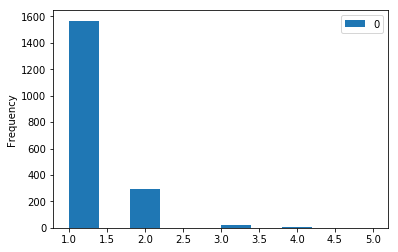

In [226]:
#G - Item (c)
cur.execute('''SELECT SUM(invoice_items.quantity) as p, tracks.name FROM invoice_items 
            INNER JOIN tracks ON invoice_items.trackID = tracks.trackID GROUP BY tracks.name ORDER BY p DESC''')
lista_mus = list(cur.fetchall())
lista_mus
df_musicas = pd.DataFrame(lista_mus)
df_musicas.plot(kind = "hist")

In [209]:
#F - Item (c)
sql = '''
        SELECT trk.name, COUNT(*) AS cnt 
        FROM invoice_items AS inv_i
        INNER JOIN tracks AS trk ON trk.trackid = inv_i.trackid
        GROUP BY trk.name
    '''

pd.read_sql_query(sql,conn)

,Name,cnt
0,"""?""",1
1,#9 Dream,1
2,'Round Midnight,1
3,(Anesthesia) Pulling Teeth,1
4,(White Man) In Hammersmith Palais,1
5,(Wish I Could) Hideaway,1
6,...And Found,1
7,...And Justice For All,1
8,01 - Prowler,1
9,04 - Running Free,1


In [254]:
#F - Item(d)

sql='''
    SELECT cstm.firstname,
    (AVG(inv.total) - (SELECT AVG(total) FROM invoices)) * (AVG(inv.total) - (SELECT AVG(total) FROM invoices)) AS dif
    FROM invoices AS inv
    INNER JOIN customers AS cstm ON cstm.customerid = inv.customerid
    GROUP BY cstm.customerid
    ORDER BY dif ASC;
    '''

pd.read_sql_query(sql,conn)

,FirstName,dif
0,Luís,0.000065
1,François,0.000065
2,Bjørn,0.000065
3,Dan,0.000065
4,Heather,0.000065
5,Wyatt,0.000065
6,Jack,0.000065
7,João,0.000065
8,Jennifer,0.018171
9,Tim,0.018171


In [248]:
#G - Item(?)
cur.execute('''SELECT * FROM customers 
            INNER JOIN invoices ON customers.customerID=invoices.customerID
            INNER JOIN invoice_items ON invoices.invoiceID=invoice_items.InvoiceID''')
for r in cur.fetchmany(5):
    print(r)

(1, 'Luís', 'Gonçalves', 'Embraer - Empresa Brasileira de Aeronáutica S.A.', 'Av. Brigadeiro Faria Lima, 2170', 'São José dos Campos', 'SP', 'Brazil', '12227-000', '+55 (12) 3923-5555', '+55 (12) 3923-5566', 'luisg@embraer.com.br', 3, 98, 1, '2010-03-11 00:00:00', 'Av. Brigadeiro Faria Lima, 2170', 'São José dos Campos', 'SP', 'Brazil', '12227-000', 3.98, 531, 98, 3247, 1.99, 1)
(1, 'Luís', 'Gonçalves', 'Embraer - Empresa Brasileira de Aeronáutica S.A.', 'Av. Brigadeiro Faria Lima, 2170', 'São José dos Campos', 'SP', 'Brazil', '12227-000', '+55 (12) 3923-5555', '+55 (12) 3923-5566', 'luisg@embraer.com.br', 3, 98, 1, '2010-03-11 00:00:00', 'Av. Brigadeiro Faria Lima, 2170', 'São José dos Campos', 'SP', 'Brazil', '12227-000', 3.98, 532, 98, 3248, 1.99, 1)
(1, 'Luís', 'Gonçalves', 'Embraer - Empresa Brasileira de Aeronáutica S.A.', 'Av. Brigadeiro Faria Lima, 2170', 'São José dos Campos', 'SP', 'Brazil', '12227-000', '+55 (12) 3923-5555', '+55 (12) 3923-5566', 'luisg@embraer.com.br', 3, 1

In [244]:
#G - Item(e)
cur.execute('''SELECT tracks.name, artists.name FROM tracks
            INNER JOIN albums ON tracks.albumID=albums.albumID
            INNER JOIN artists ON albums.artistID=artists.artistID''')
copia = list(cur.fetchall())
cur.execute('''SELECT tracks.name, artists.name FROM tracks
            INNER JOIN albums ON tracks.albumID=albums.albumID
            INNER JOIN artists ON albums.artistID=artists.artistID''')
l_must, l_art = zip(*cur.fetchall())
l_art = list(set(l_art))
dic_mus = {}
for ind in range(len(l_art)):
    dic_mus[l_art[ind]]=[]

In [247]:
for ind in range(len(copia)):
    dic_mus[copia[ind][1]].append(copia[ind][0])
#dic_mus